In [18]:
import networkx as nx

import geopandas as gpd
import matplotlib.pyplot as plt

In [19]:
df_st = gpd.read_file(r'demo\demo.shp')
df_st

,Shape_Leng,geometry
0,94.507770,"LINESTRING (819735.719 4699760.681, 819731.991..."
1,53.688801,"LINESTRING (819735.703 4699563.776, 819737.386..."
2,43.721169,"LINESTRING (819616.921 4700020.490, 819660.621..."
3,23.769224,"LINESTRING (819821.011 4699764.763, 819844.713..."
4,93.835801,"LINESTRING (819608.481 4699766.388, 819610.590..."
...,...,...
2204,48.559930,"LINESTRING (823146.104 4698380.375, 823145.575..."
2205,227.221373,"LINESTRING (823020.685 4697762.719, 822998.360..."
2206,102.143535,"LINESTRING (820279.764 4698739.121, 820327.244..."
2207,17.442249,"LINESTRING (820850.957 4697956.221, 820859.554..."


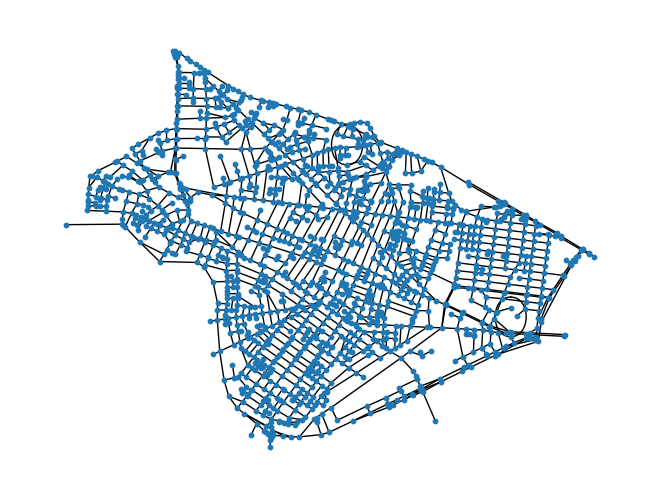

<Figure size 2000x2000 with 0 Axes>

In [20]:
# create an empty graph
G = nx.Graph()

# iterate over each row in the geodataframe
for idx, row in df_st.iterrows():
    # extract the LineString object
    line = row.geometry
    # extract the start and end points
    start, end = line.coords[0], line.coords[-1]
    # add the nodes to the graph
    G.add_node(start, pos=(line.coords[0]))
    G.add_node(end, pos=(line.coords[-1]))
    # add the edge to the graph
    G.add_edge(start, end, length=line.length)

#relabel graph nodes
new_ids = {}
count = 0
for node in G.nodes():
    new_ids[node] = count
    count += 1
G = nx.relabel_nodes(G, new_ids)

#set the crs of the graph
G.graph['crs'] = 'EPSG:26918'

# Get the node positions from the pos attribute
pos = nx.get_node_attributes(G, 'pos')
# Get the edge lengths from the length attribute
edge_lengths = nx.get_edge_attributes(G, 'length')

# Draw the graph
nx.draw(G, pos, with_labels=False, node_size=10, font_size=6)

# Show the plot
plt.figure(figsize=(20, 20))
plt.show()

In [21]:
from betweenness_centrality_adjustment import betweenness_centrality_bound

In [22]:
betweenness_centrality_bound(G, k=None, seed=None, normalized=True, weight='length', bound=600)

{0: 0.00036933234191023265,
 1: 0.000333379636060564,
 2: 0.00022960705326720214,
 3: 0.00022633862546268682,
 4: 0.000230424160218331,
 5: 0.00023777812277849049,
 6: 0.00018221485010172983,
 7: 0.0002328754810717175,
 8: 0.00017077535278592617,
 9: 0.00028598743289509165,
 10: 0.0001495305720565765,
 11: 0.0003660639141057173,
 12: 0.00038404026703055163,
 13: 0.0002876216467973493,
 14: 7.59909464549815e-05,
 15: 5.14777379211165e-05,
 16: 0.00044614039531634295,
 17: 0.00028353611204170515,
 18: 0.0006978093362640237,
 19: 0.0007966792773506124,
 20: 0.0001250173635227115,
 21: 7.762516035723917e-05,
 22: 2.287899463160733e-05,
 23: 9.723572718433116e-05,
 24: 3.9221133654183996e-05,
 25: 5.311195182337416e-05,
 26: 2.7781636338380332e-05,
 27: 0.00013155421913174217,
 28: 4.739220316547233e-05,
 29: 0.0003260256735004045,
 30: 0.00039221133654183997,
 31: 0.00019283724046640467,
 32: 0.00015116478595883417,
 33: 0.0002778163633838033,
 34: 0.000303963785819926,
 35: 0.000371783662

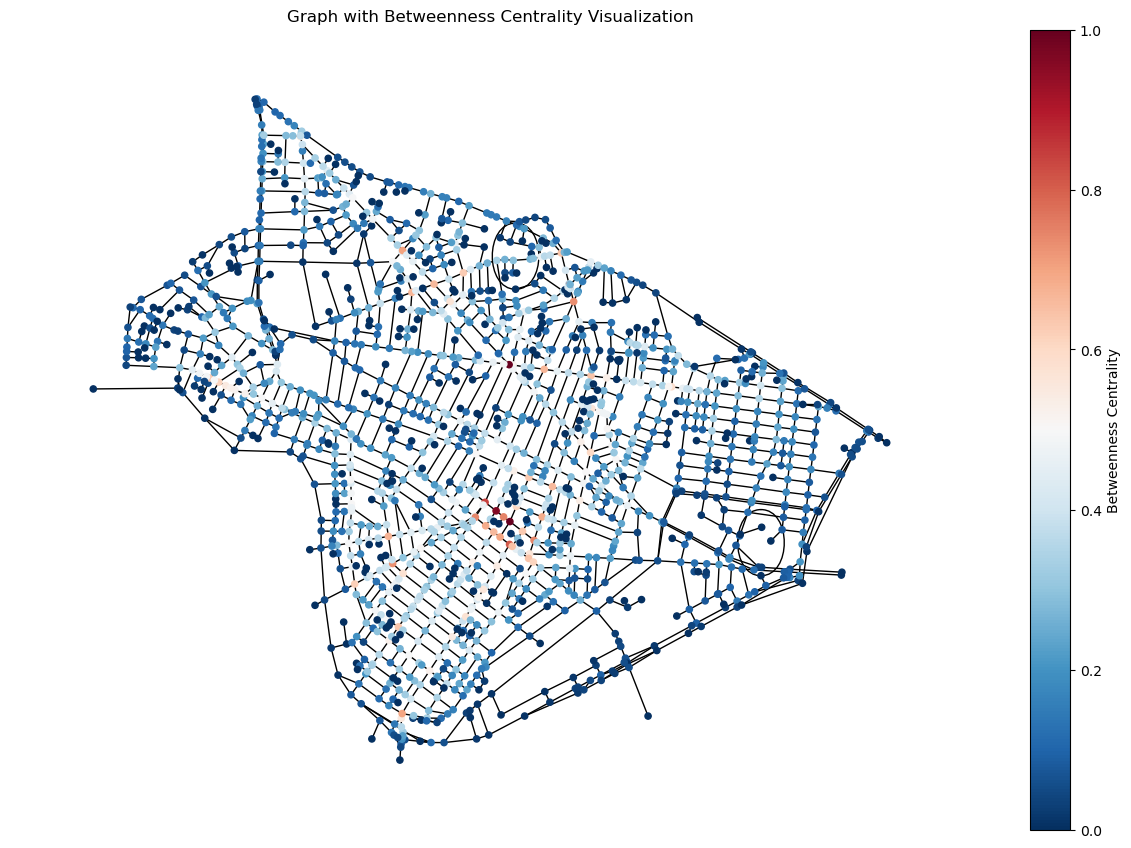

In [23]:
betweenness_centrality = betweenness_centrality_bound(G, k=None, seed=None, normalized=True, weight='length', bound=600)

# Create a copy of the graph to avoid modifying the original graph
G_copy = G.copy()

# Add betweenness centrality values as node attributes
nx.set_node_attributes(G_copy, betweenness_centrality, 'betweenness_centrality')

# Define node colors based on betweenness centrality values
node_colors = [G_copy.nodes[node]['betweenness_centrality'] for node in G_copy.nodes]

# Draw the graph with node colors representing betweenness centrality
plt.figure(figsize=(12, 8))
nx.draw(G_copy, pos, node_size=20, node_color=node_colors, cmap=plt.cm.RdBu_r, with_labels=False)

# Create a dummy scatter plot for the colorbar
dummy_scatter = plt.scatter([], [], c=[], cmap=plt.cm.RdBu_r)
plt.colorbar(dummy_scatter, label='Betweenness Centrality')

plt.title('Graph with Betweenness Centrality Visualization')
plt.show()



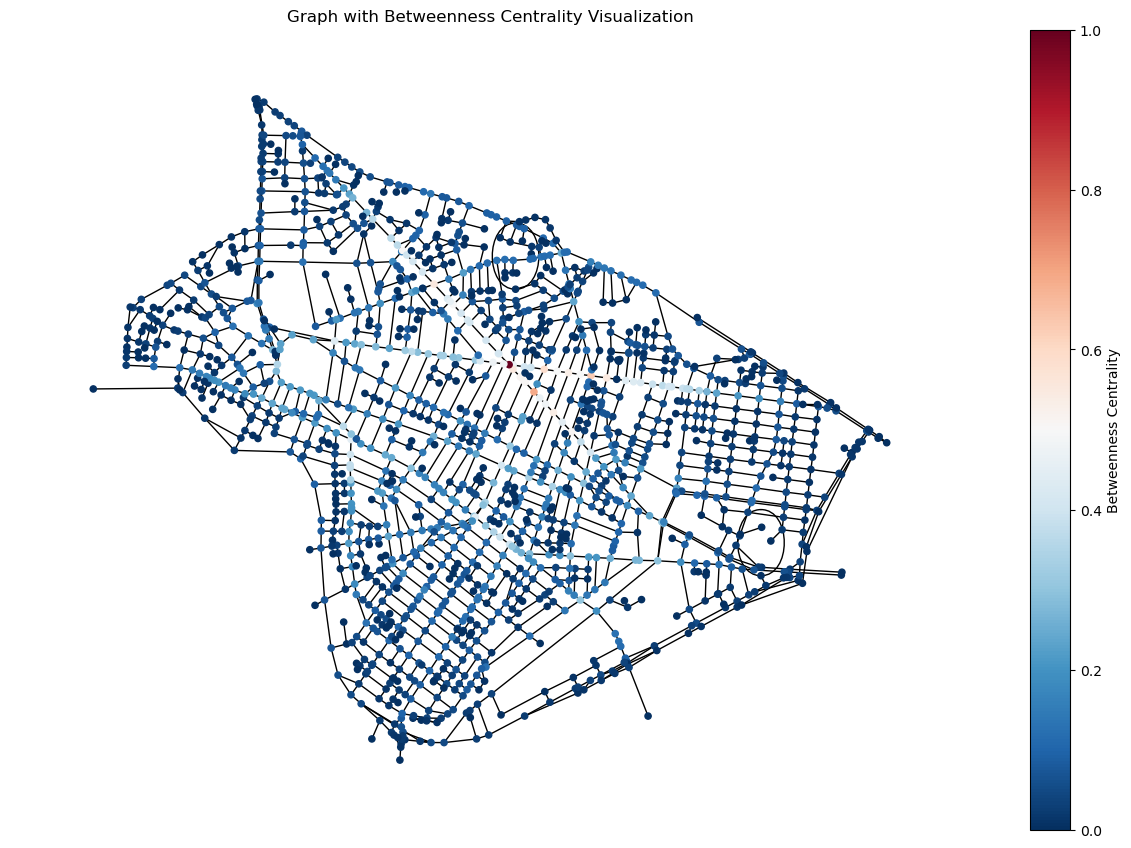

In [24]:
betweenness_centrality = nx.betweenness_centrality(G, weight='length', normalized=True)

# Create a copy of the graph to avoid modifying the original graph
G_copy = G.copy()

# Add betweenness centrality values as node attributes
nx.set_node_attributes(G_copy, betweenness_centrality, 'betweenness_centrality')

# Define node colors based on betweenness centrality values
node_colors = [G_copy.nodes[node]['betweenness_centrality'] for node in G_copy.nodes]

# Draw the graph with node colors representing betweenness centrality
plt.figure(figsize=(12, 8))
nx.draw(G_copy, pos, node_size=20, node_color=node_colors, cmap=plt.cm.RdBu_r, with_labels=False)

# Create a dummy scatter plot for the colorbar
dummy_scatter = plt.scatter([], [], c=[], cmap=plt.cm.RdBu_r)
plt.colorbar(dummy_scatter, label='Betweenness Centrality')

plt.title('Graph with Betweenness Centrality Visualization')
plt.show()